<a href="https://colab.research.google.com/github/HBocaccio/NumLabIMC/blob/main/TPs/TP1/TP1IMC2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Introducción al modelado continuo** (_a.k.a._ **Ecuaciones de la física matemática**) - 2do Cuatrimestre 2024

# **Trabajo Práctico 1**

Este es el trabajo práctico del 1er eje temático. Se trata de un conjunto de ejercicios que deben resolver numéricamente y entregar para el **martes 22 de octubre, inclusive**. El trabajo se puede hacer en **grupos de hasta 3 personas**. Deben desarrollar los ejercicios en una **notebook** de Python en Google Colab. Deben **compartir el link del archivo final** (previamente dando permisos para compartir como lector), alojado en el Google Drive de alguno de los integrantes del grupo, y mandar el link del archivo al mail *hbocaccio@gmail.com*. Deben **enviar un único mail por grupo**. El nombre del archivo debe incluir los apellidos de los integrantes del grupo separados con guión bajo, resultando el siguiente **formato “TP1IMC2024_APELLIDO1_APELLIDO2_APELLIDO3.ipynb”**.

El contenido del archivo debe incluir las celdas de código necesarias para responder las consignas, intercalando con celdas de texto en las que cuenten lo que hicieron de manera resumida. También deben incluir texto explicando los resultados obtenidos y cómo estos responden a las consignas planteadas. Se valorará cualquier tipo de discusión de los resultados en referencia a conceptos tanto de la parte numérica como de la parte dinámica. No es necesario que se extiendan mucho en las explicaciones, pero sí que muestren conocimientos adquiridos a lo largo de la cursada en referencia a los contenidos fundamentales de la materia.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

---

# Ejercicio 1

Sea el siguiente sistema dinámico unidimensional

$$
\dot{x} = -x + S(\rho+cx)
$$

con

$$
S(\rho+cx)=\frac{1}{1+e^{-(\rho+cx)}}
$$

donde la función $S(\rho+cx)$ es la función sigmoidea con la entrada parametrizada en base a los parámetros $\rho$ y $c$.


1.1. Defina una función de Python que refleje los valores de la función sigmoidea en base a un valor de x, incluyendo la posibilidad de definir los parámetros como argumento de entrada. Considere por default los valores de parámetros para que el resultado sea la función $S(x)$.


In [15]:
# 1.1
def sigmoidea(p=0, c=1):
    def f(x):
        return 1 / (1 + np.exp(-(p + c * x)))
    return f

1.2. Estudie gráficamente la incidencia de los parámetros $\rho$ y $c$ en la forma funcional de la sigmoidea. Qué efecto tiene cada parámetro?


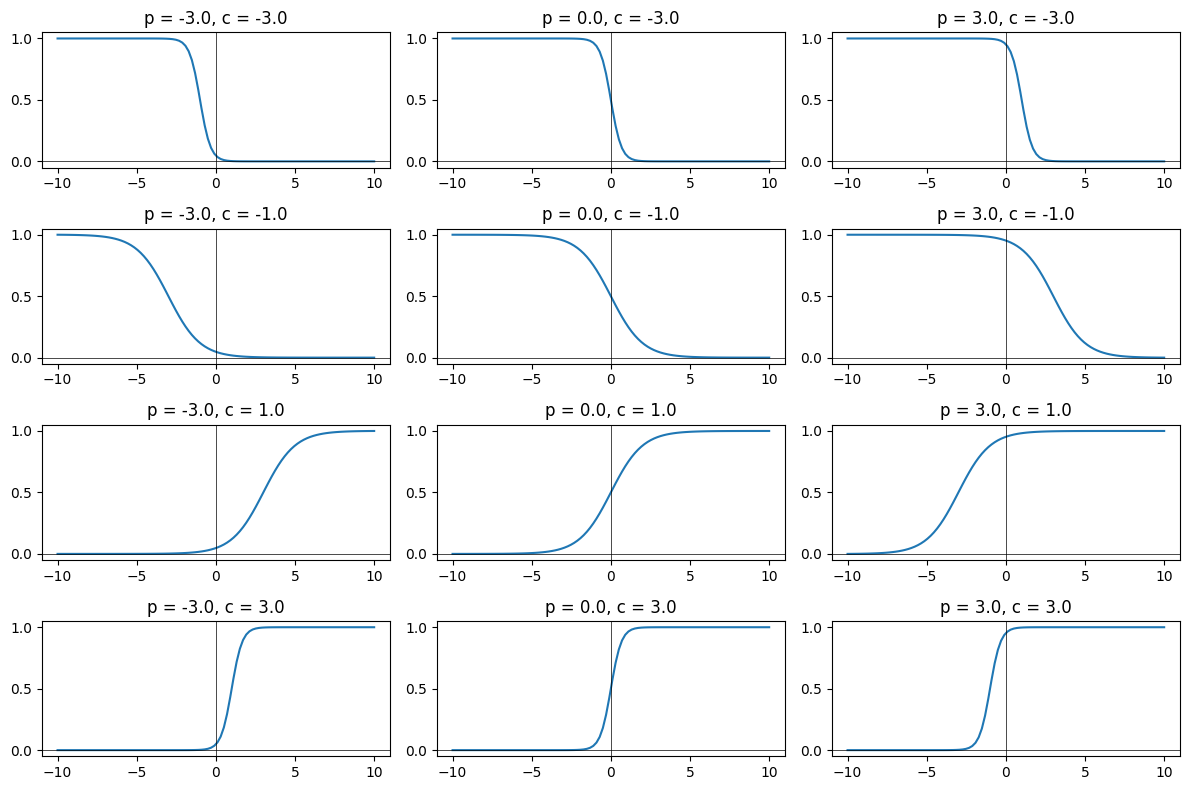

In [16]:
# 1.2
p_dim = 3
c_dim = 4
p = np.linspace(-3, 3, p_dim)
c = np.linspace(-3, 3, c_dim)
p, c = np.meshgrid(p, c)

fig, axs = plt.subplots(c_dim, p_dim, figsize=(12, 8))
for i in range(c_dim):
    for j in range(p_dim):
        x = np.linspace(-10, 10, 100)
        axs[i, j].plot(x, sigmoidea(p[i, j], c[i, j])(x))
        axs[i, j].set_title(f"p = {p[i, j]}, c = {c[i, j]}")
        axs[i, j].axhline(0, color="black", lw=0.5)
        axs[i, j].axvline(0, color="black", lw=0.5)
plt.tight_layout()

# Notar en el dibujo de abajo que el c cambia la pendiente de la sigmoidea,
# mientras que el p la traslada en el eje x

1.3. Estudie gráficamente la posibilidad de existencia de puntos fijos del sistema para c=10.


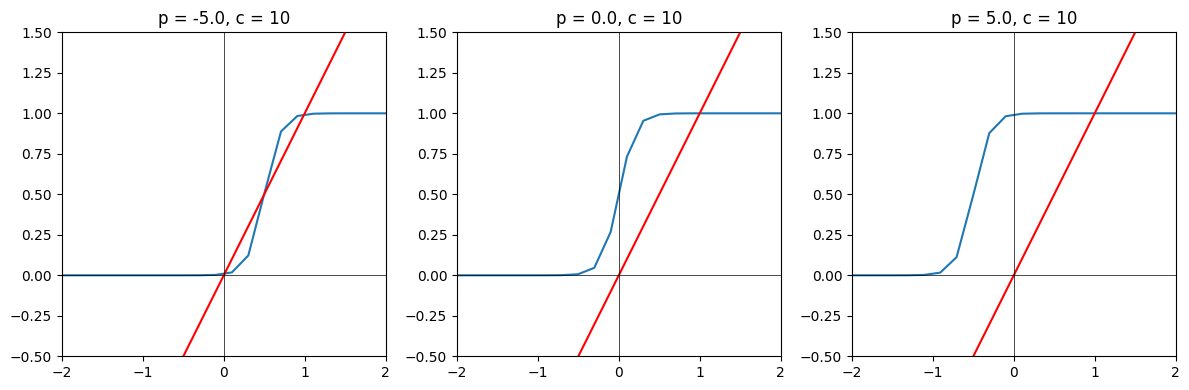

In [17]:
# 1.3
ps = np.linspace(-5, 5, 3)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    xs = np.linspace(-10, 10, 100)
    ys1 = sigmoidea(ps[i], 10)(xs)
    ys2 = xs

    axs[i].plot(xs, ys1, label="sigmoide")
    axs[i].plot(xs, ys2, color="red", label="x")
    axs[i].set_title(f"p = {ps[i]}, c = 10")
    axs[i].axhline(0, color="black", lw=0.5)
    axs[i].axvline(0, color="black", lw=0.5)
    axs[i].set_ylim(-0.5, 1.5)
    axs[i].set_xlim(-2, 2)

plt.tight_layout()

# Para p = -5 hay 3 puntos fijos
# Para p >= 0 hay 1 punto fijo

# En algun lugar en el medio la recta es tangente a la sigmoidea y hay exactamente 2 puntos fijos
# TODO: averiguar cual es ese punto y poner un grafico ahi

1.4. Usando las herramientas numéricas, busque los puntos fijos del sistema para c=10 y distintos valores de $\rho$ elegidos criteriosamente en base al ejercicio anterior. Recuerde aplicar alguna estrategia para limpiar artefactos en las raíces encontradas si los hubiese, como por ejemplo, pedir que el campo vector evaluado en la raíz sea menor a una cierta cota tolerada. Analice su estabilidad a partir de la derivada numérica. Haga un diagrama de bifurcaciones para los valores de $\rho$ elegidos. Qué tipo de bifurcaciones encuentra?

In [18]:
def central(f, x, h=0.01):
    return (f(x+h) - f(x-h))/(2*h)

def forward(f, x, h=0.01):
    return (f(x+h) - f(x))/h

def backward(f, x, h=0.01):
    return (f(x) - f(x-h))/h

def derivar(f, x0, method="central", h=0.01):
    if method == "central":
        return central(f, x0, h)
    elif method == "forward":
        return forward(f, x0, h)
    elif method == "backward":
        return backward(f, x0, h)

In [19]:
def raices(f, f_prima, posibles_ci, sample=20):
    condiciones_iniciales = np.random.choice(posibles_ci, size=sample)
    soluciones = []
    for c in condiciones_iniciales:
        tol = 0.0001
        sol, info = sp.optimize.newton(
            f, fprime=f_prima, x0=c, tol=tol, maxiter=100, disp=False, full_output=True
        )
        if abs(f(sol)) < tol:
            soluciones.append(sol)
    return np.unique(np.array(soluciones).round(2))

/var/folders/rv/0brfn3g10137qh8fcq6ch2c00000gn/T/ipykernel_2917/2348895049.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-(p + c * x)))


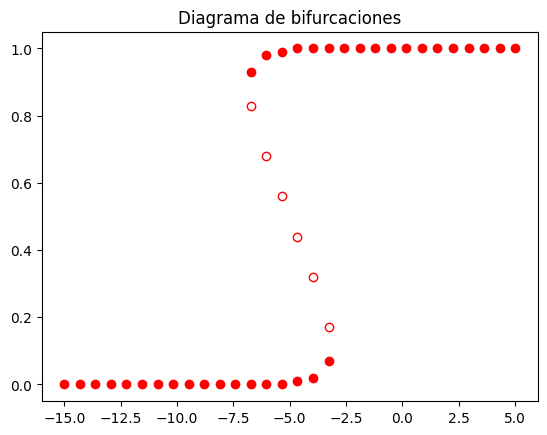

In [20]:
def campovector(p, c):
    def f(x):
        return -x + sigmoidea(p, c)(x)

    return f

ps = np.linspace(-15, 5, 30)
posibles_ci = np.linspace(-5, 5, 100)

for p in ps:
    campovector_p = campovector(p, 10)
    raices_ = raices(campovector_p, None, posibles_ci, 100)
    for raiz in raices_:
        estabilidad = derivar(campovector_p, raiz)
        plt.plot(
            p,
            raiz,
            "o",
            markerfacecolor=("r" if estabilidad < 0 else "w"),
            markeredgecolor="r",
        )

plt.title("Diagrama de bifurcaciones")
plt.show()

# TODO: Lo unico que queda aca es que no me acuerdo como era el tema de la estabilidad

1.5. Para c=10, elija 3 valores de $\rho$ que definan comportamientos del sistema cualitativamente distintos. Para cada uno de estos valores de $\rho$, estudie las soluciones del sistema, obtenidas de integrar con el método de Euler, para distintos valores iniciales. Cómo interpreta las trayectorias encontradas y cómo las relaciona con los resultados previos?


In [21]:
def odeEuler(f, ci, h, t_max):
    ts = [0]
    xs = [ci]
    while ts[-1] < t_max:
        t = ts[-1]
        x = xs[-1]
        ts.append(t + h)
        xs.append(x + f(x) * h)
    return ts, xs

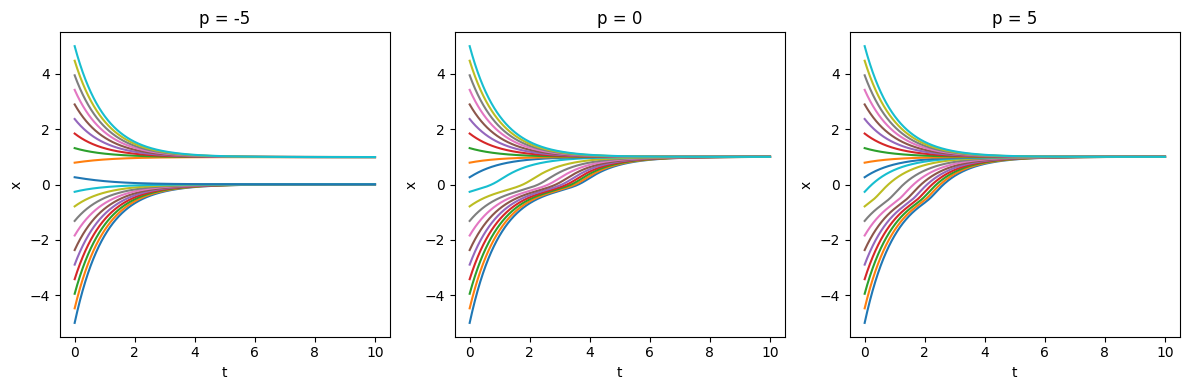

In [22]:
# TODO: Me gustaria que el del medio no sea 0 si no el valor para el cual hay 
# 2 puntos fijos. Pero para eso tenemos que calcularlo.

ps = [-5, 0, 5]
h = 0.001
t_max = 10
cis = np.linspace(-5, 5, 20)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i, p in enumerate(ps):
    for ci in cis:
        ts, xs = odeEuler(campovector(p, 10), ci, h, t_max)
        axs[i].plot(ts, xs)
        axs[i].set_title(f"p = {p}")
    axs[i].set_xlabel("t")
    axs[i].set_ylabel("x")
    
plt.tight_layout()


---

# Ejercicio 2

Sea el siguiente sistema 2D

$$
\dot{x} = - x - x^{2} - y \\
\dot{y} = x - y
$$

2.1. Defina el sistema con una función de Python.

In [43]:
def campovector(t, z):
    x, y = z
    dxdt = -x - x**2 - y
    dydt = x - y
    return dxdt, dydt


2.2. Busque puntos fijos a partir del estudio gráfico de las nulclinas. Para el gráfico de las nulclinas use `plt.contour` para levels=[0].

In [44]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
xs, ys = np.meshgrid(x, y)
dxs, dys = campovector(0, [xs, ys])

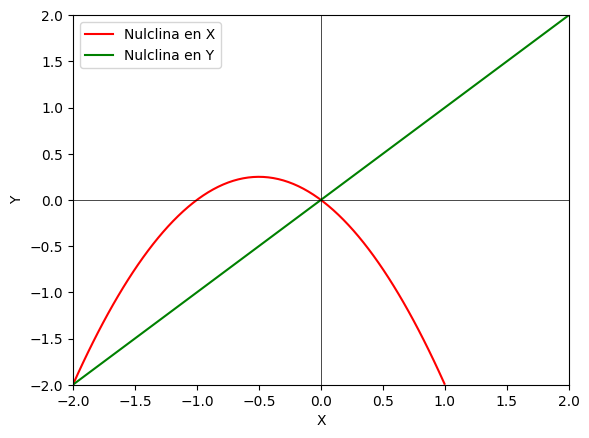

In [45]:
contour_x = plt.contour(xs, ys, dxs, levels=[0], colors=["r"])
contour_y = plt.contour(xs, ys, dys, levels=[0], colors=["g"])

# Create dummy plots for the legend
plt.plot([], [], color="r", label="Nulclina en X")
plt.plot([], [], color="g", label="Nulclina en Y")

plt.xlabel("X")
plt.ylabel("Y")

plt.axhline(0, color="black", lw=0.5)
plt.axvline(0, color="black", lw=0.5)

plt.legend(loc="upper left")
plt.show()

# Tenemos puntos fijos en (-2, -2) y (0, 0)

2.3. Busque numéricamente los puntos fijos con `fsolve` de Scipy.

In [46]:
def campovector_sin_t(z):
    return campovector(0, z)

zs = list(zip(xs.ravel(), ys.ravel()))

raices = set()
for z in zs:
    raiz = tuple(sp.optimize.fsolve(campovector_sin_t, z).round(2))
    raices.add(raiz)

/var/folders/rv/0brfn3g10137qh8fcq6ch2c00000gn/T/ipykernel_2917/3513724884.py:8: RuntimeWarning: xtol=0.000000 is too small, no further improvement in the approximate
  solution is possible.
  raiz = tuple(sp.optimize.fsolve(campovector_sin_t, z).round(2))
/var/folders/rv/0brfn3g10137qh8fcq6ch2c00000gn/T/ipykernel_2917/3513724884.py:8: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  raiz = tuple(sp.optimize.fsolve(campovector_sin_t, z).round(2))


In [47]:
raices

{(np.float64(-2.0), np.float64(-2.0)), (np.float64(0.0), np.float64(0.0))}

2.4. Defina una función de Python genérica que tenga la matriz Jacobiana en función de valores de "x" e "y". Evalúe la matriz en los puntos fijos y estudie su estabilidad. Qué tipo de puntos fijos son?

In [54]:
def jacobiano(F, x, y, h=0.01):
    dfdx = (np.array(F((x + h, y))) - np.array(F((x - h, y))))[0] / (2 * h)
    dfdy = (np.array(F((x, y + h))) - np.array(F((x, y - h))))[0] / (2 * h)
    dgdx = (np.array(F((x + h, y))) - np.array(F((x - h, y))))[1] / (2 * h)
    dgdy = (np.array(F((x, y + h))) - np.array(F((x, y - h))))[1] / (2 * h)
    return np.array([[dfdx, dfdy], [dgdx, dgdy]])


print("En (0,0) la matriz jacobiana es: \n", jacobiano(campovector_sin_t, 0, 0))
print("En (-2,-2) la matriz jacobiana es: \n", jacobiano(campovector_sin_t, -2, -2))

En (0,0) la matriz jacobiana es: 
 [[-1. -1.]
 [ 1. -1.]]
En (-2,-2) la matriz jacobiana es: 
 [[ 3. -1.]
 [ 1. -1.]]


In [57]:
# Luego el punto fijo (0,0) es estable (tiene un espiral, no se como se llama eso)
# Y el punto fijo (-2,-2) tiene un aval positivo y otro negativo, por lo que es estable en una direccion e inestable en la otra

2.5. Grafique el campo vector usando `plt.streamplots`. Interprete las líneas de campo obtenidas en referencia al item anterior.

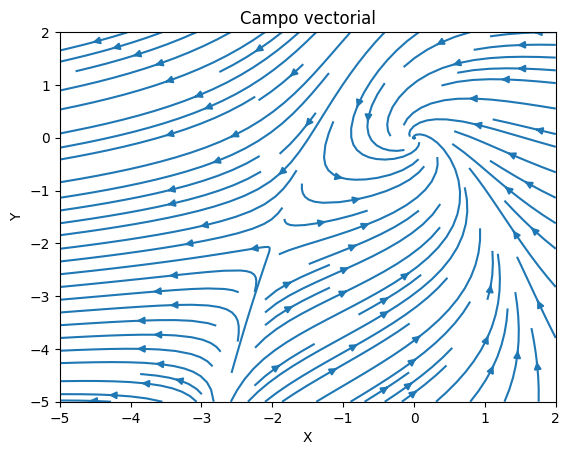

In [59]:
x = np.linspace(-5, 2, 100)
y = np.linspace(-5, 2, 100)
xs, ys = np.meshgrid(x, y)
dxs, dys = campovector(0, [xs, ys])

plt.streamplot(xs, ys, dxs, dys)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Campo vectorial")
plt.show()

2.6. Encuentre trayectorias en el espacio de fases que describan comportamientos del sistema. Para esto resuelva el sistema, usando `solve_ivp`. Use pasos largos, tiempos de integración muy cortos. Elija estos valores y las condiciones iniciales criteriosamente, de manera tal de reforzar los resultados previos, mostrando qué tipos de elementos dinámicos presenta el sistema en base a sus observaciones.

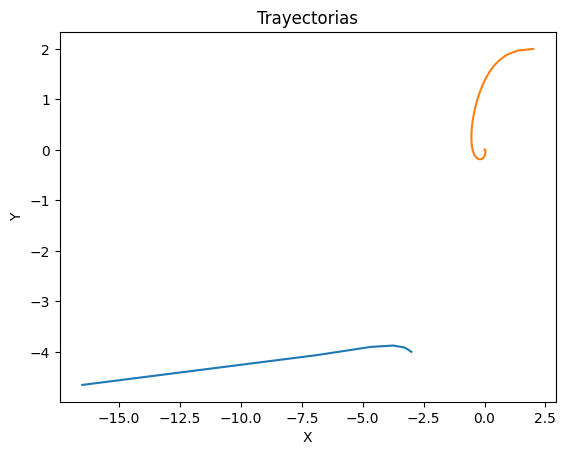

In [64]:
# TODO: Lo voy a hacer para condiciones iniciales genericas y luego las elegimos bien
z1= [-3, -4]
z2= [2, 2]

cis = [z1, z2]
dt = 0.1
t_max = 10
t = np.arange(0, t_max, dt)


for ci in cis:
    sol = sp.integrate.solve_ivp(campovector, [t[0], t[-1]], ci, t_eval=t, method='RK45')
    xs, ys = sol.y
    plt.plot(xs, ys)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Trayectorias")
plt.show()



---
# Ejercicio 3

**Modelo SIR**

Para modelar la evolución de una infección en una población se la puede dividir en tres grupos: los *susceptibles* de contraer la enfermedad ($S$), los *infectados* ($I$) y los *recuperados* ($R$). La relación entre el número de personas en cada grupo está definida por el siguiente sistema de ODEs:

$$
\frac{dS}{dt} = -\beta \frac{S\,I}{N}\\
\frac{dI}{dt} = \beta \frac{S\,I}{N} - \gamma\, I\\
\frac{dR}{dt} = \gamma\, I
$$

con $\beta$ y $\gamma$ las tasas de infección y recuperación respectivamente y $N$ la población total.

3.1. Considerar que la población de $N = 10000$ habitantes e inicialmente todas las personas son susceptibles. Supondremos una tasa de transmisión $\beta=0.2$ y un tiempo medio de recuperación de 10 días (es decir, una tasa $\gamma$ de 1/10). Si inicialmente hay una única persona enferma, discutir de qué forma deberían evolucionar las poblaciones de cada grupo. [Hint: considere que todas las personas que no están enfermas son susceptibles].

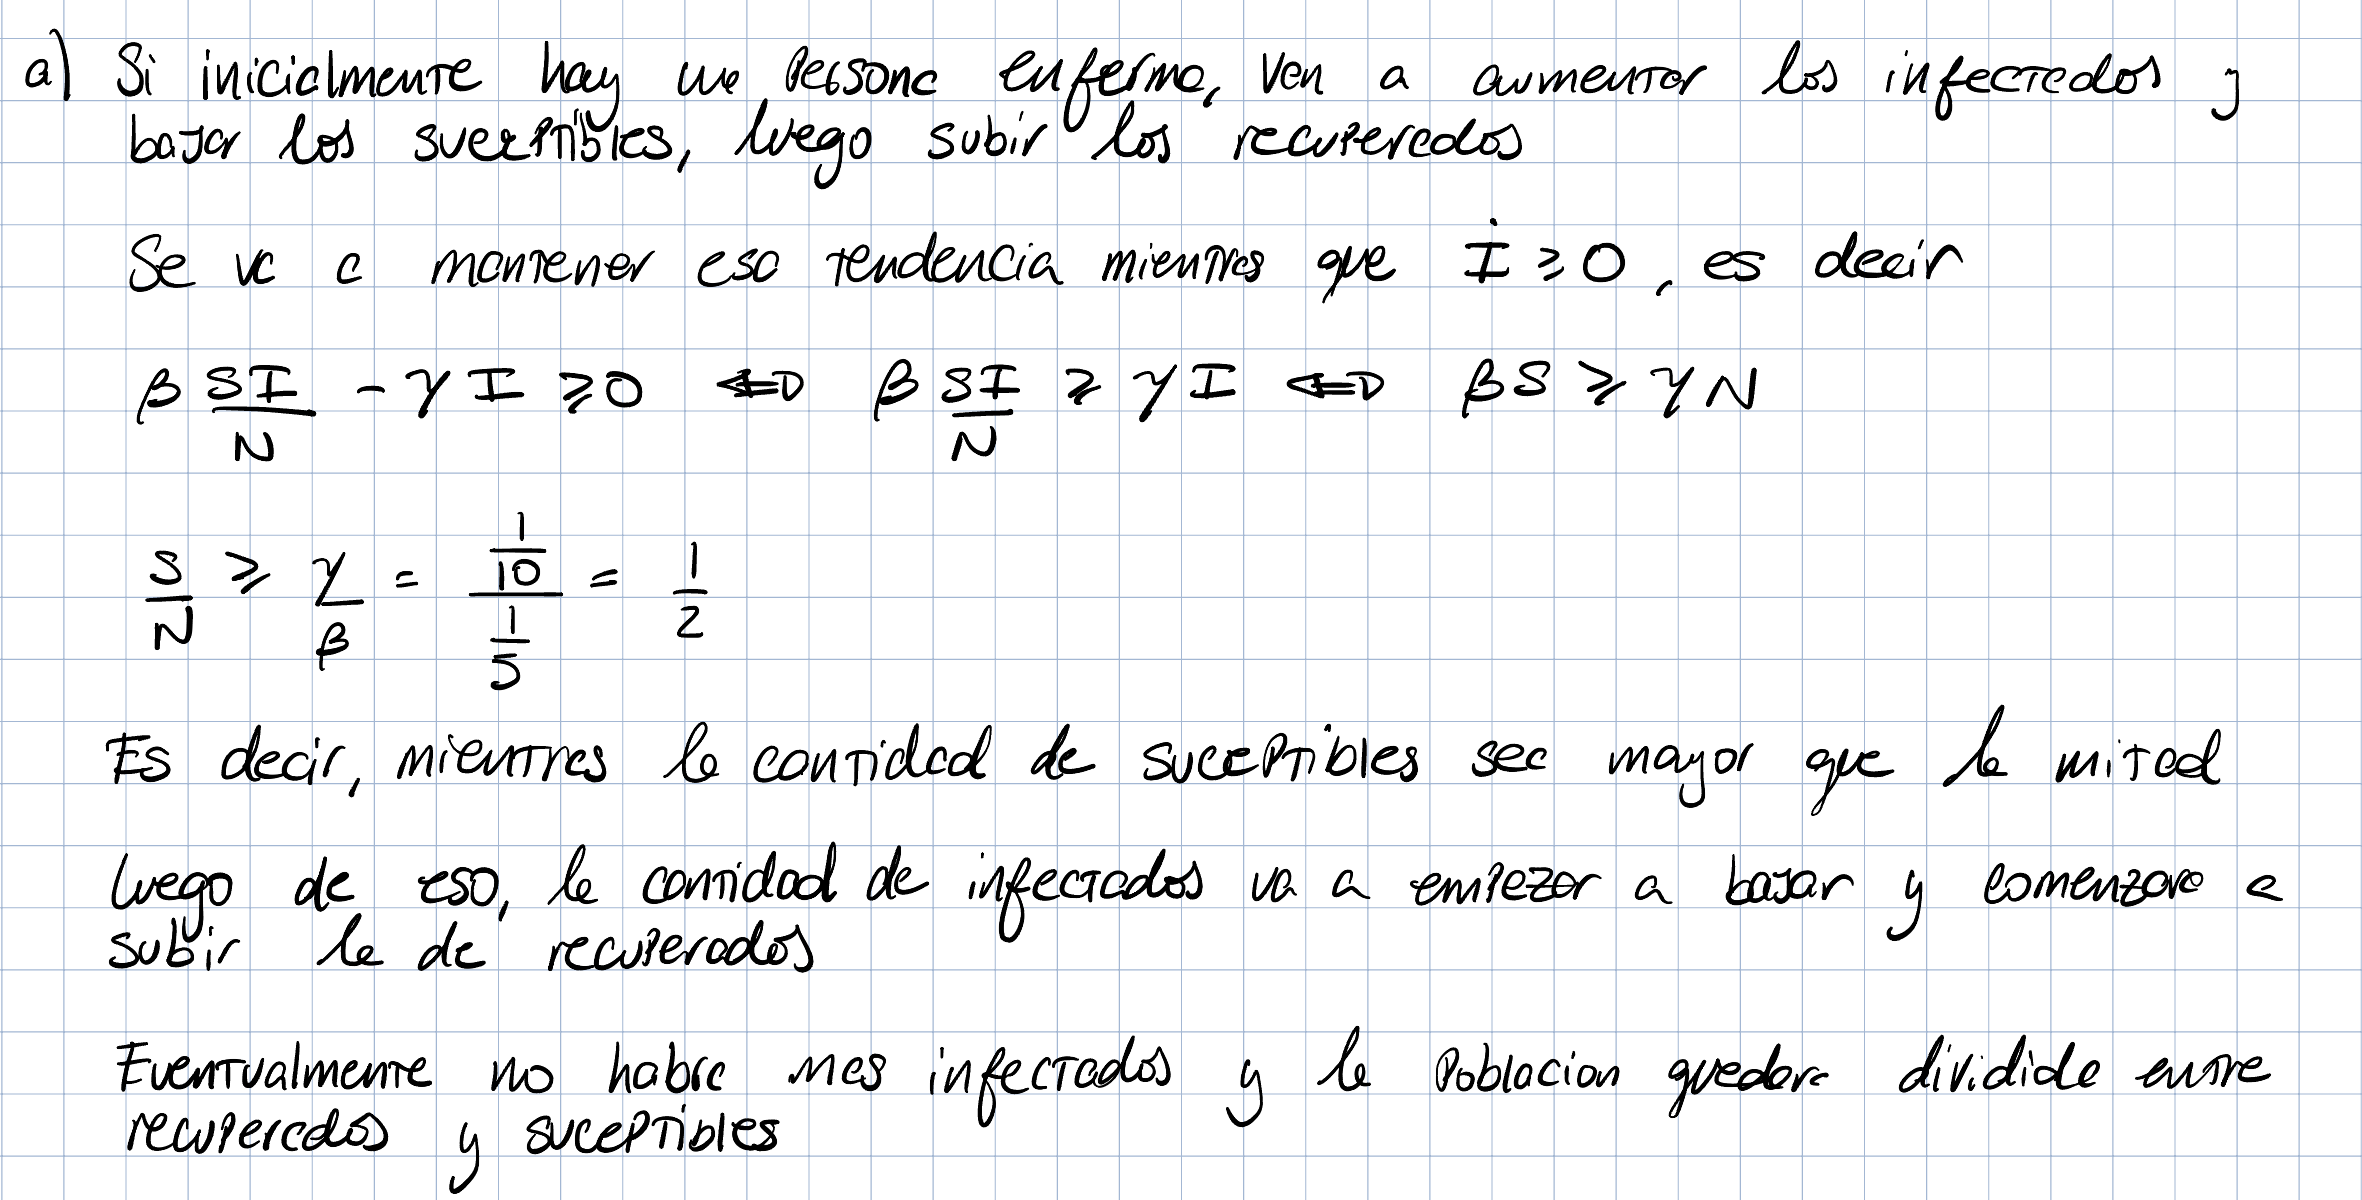

3.2. Asumiendo que no se producen fallecimientos, verificar que la población de la ciudad se mantiene constante a lo largo de la simulación.

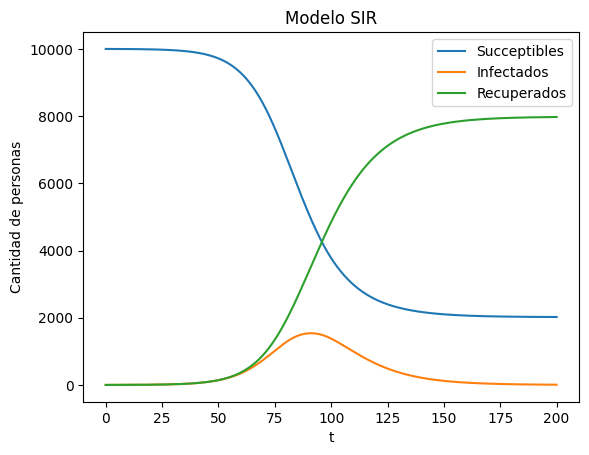

In [70]:
def campovector(b, g, N):
    def f(t, z):
        S, I, R = z
        dSdt = -b * S * I / N
        dIdt = b * S * I / N - g * I
        dRdt = g * I
        return [dSdt, dIdt, dRdt]
    return f

b = 0.2
g = 0.1
N = 10000

S0 = 9999
I0 = 1
R0 = 0

t = np.linspace(0, 200, 1000)
ci = [S0, I0, R0]

sol = sp.integrate.solve_ivp(campovector(b, g, N), [t[0], t[-1]], ci, t_eval=t, method='RK45')
S, I, R = sol.y

plt.plot(t, S, label="Succeptibles")
plt.plot(t, I, label="Infectados")
plt.plot(t, R, label="Recuperados")
plt.xlabel("t")
plt.ylabel("Cantidad de personas")
plt.legend()
plt.title("Modelo SIR")
plt.show()


In [71]:
# Veamos que la cantidad de personas es constante
S + I + R

array([10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
      


3.3. Determinar el tiempo a partir del cual, sin acciones externas, la cantidad de infecciones llega a su máximo y comienza a descender (calcular, no hacer a ojo). Mostrar cuál sería ese momento en la curva de I(t).

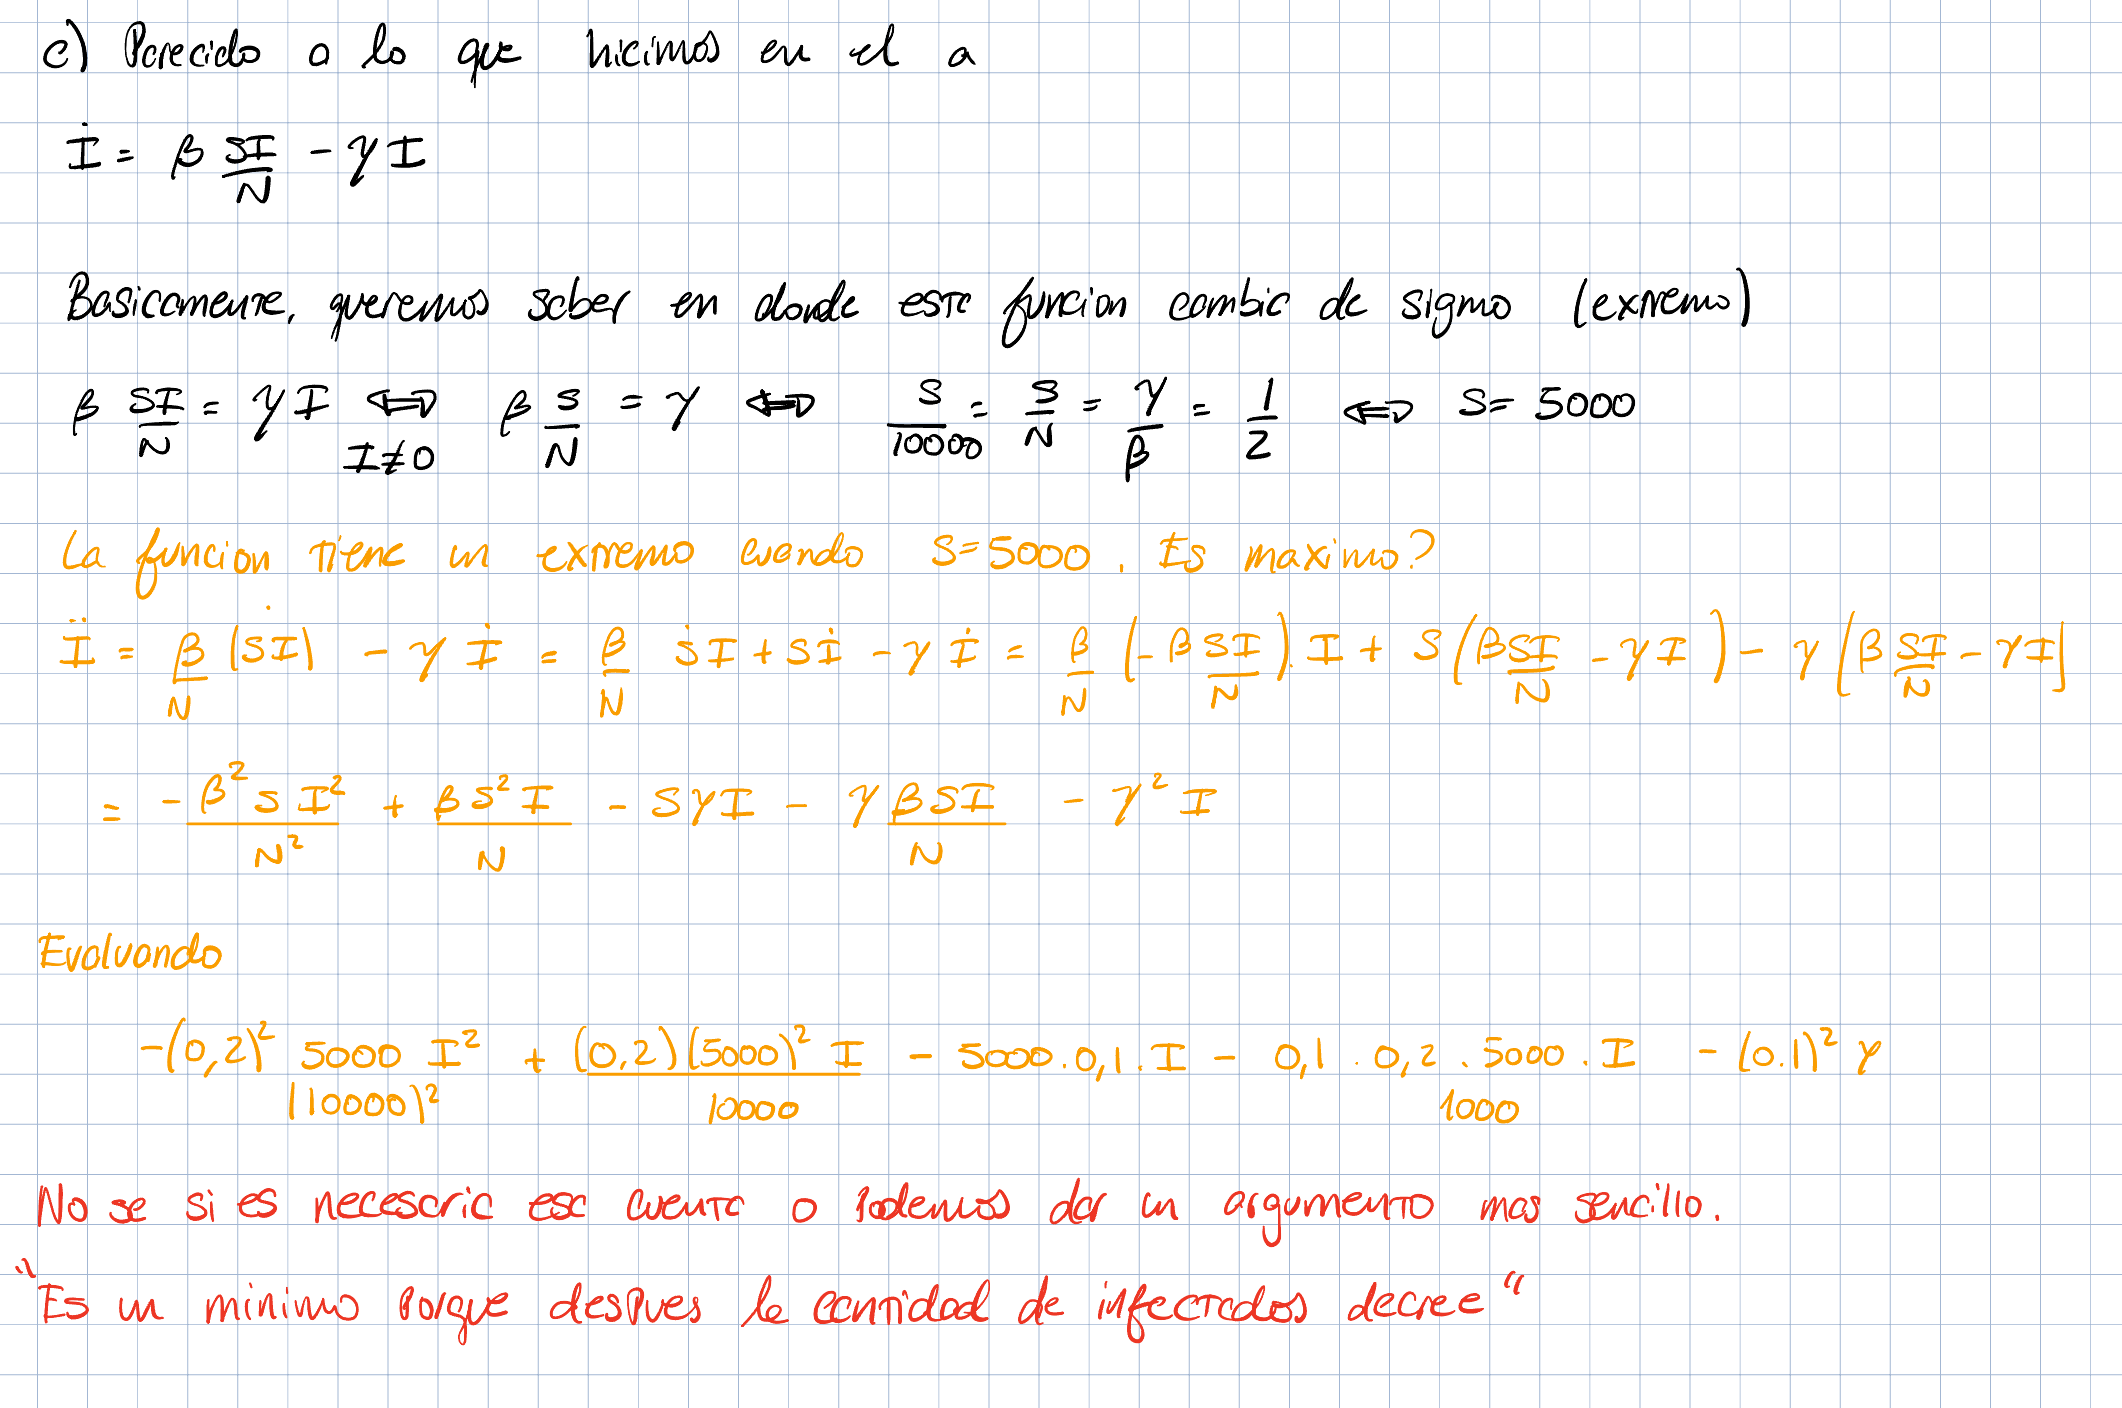

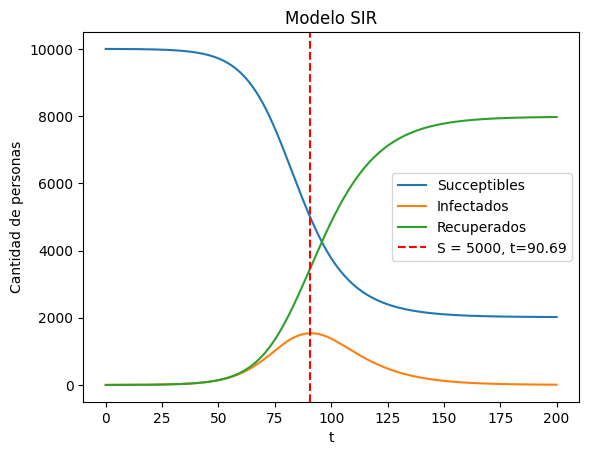

In [81]:
plt.plot(t, S, label="Succeptibles")
plt.plot(t, I, label="Infectados")
plt.plot(t, R, label="Recuperados")

t_5000 = t[np.where(S < 5000)[0][0]]
plt.axvline(t_5000, color="red", linestyle="--", label=f"S = 5000, t={t_5000:.2f}")

plt.xlabel("t")
plt.ylabel("Cantidad de personas")
plt.legend()
plt.title("Modelo SIR")
plt.show()


In [80]:
np.where(S < 5000)[0][0]

np.int64(453)

In [ ]:
t_inflexion = np.argwhere(S=5000)
